Combined shape: (12077, 7)
            Close_AMZN  Close_GOOGL  Close_IBM  Close_MSFT
Date                                                      
2006-01-03       47.58       217.83      82.06       26.84
2006-01-04       47.25       222.84      81.95       26.97
2006-01-05       47.65       225.85      82.50       26.99
2006-01-06       47.87       233.06      84.95       26.91
2006-01-09       47.08       233.68      83.73       26.86
X shape: (3009, 10, 4) | y shape: (3009,)
Train samples: 2407 | Test samples: 602


c:\Users\Preety Sharma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0022 - mae: 0.0297 - val_loss: 0.0086 - val_mae: 0.0826 - learning_rate: 0.0010
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7308e-04 - mae: 0.0137 - val_loss: 0.0073 - val_mae: 0.0776 - learning_rate: 0.0010
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5086e-04 - mae: 0.0116 - val_loss: 0.0036 - val_mae: 0.0507 - learning_rate: 0.0010
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1404e-04 - mae: 0.0107 - val_loss: 0.0020 - val_mae: 0.0361 - learning_rate: 0.0010
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8892e-04 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0286 - learning_rate: 0.0010
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6419e-04 - mae: 0.0093 - val_loss: 6.0679e-04 - val_mae: 0.0188 - learning_rate: 0.0010
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4434e-04 - mae: 0.0087 - val_loss: 6.8647e-04 - val_mae: 0.0214 - learni

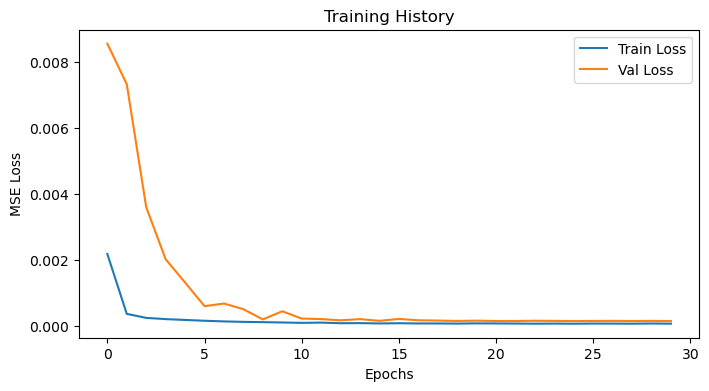

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Test Set Performance Metrics (original scale):
--------------------------------------------------
MAE: $2.48
RMSE: $3.33
R²: 0.9086
MAPE: 3.67%


c:\Users\Preety Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


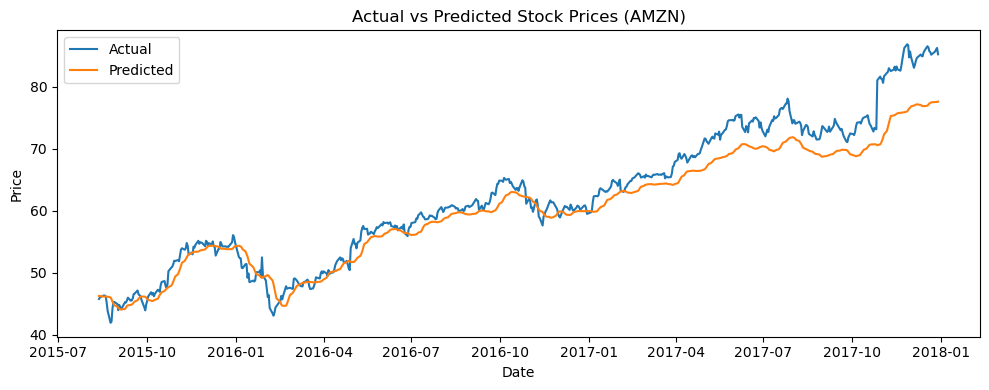

In [ ]:
# ============================================
# 📘 RNN / LSTM Stock Price Prediction Project
# ============================================

# --- 1️⃣ Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 2️⃣ Load Data
amzn = pd.read_csv("./data/AMZN_stocks_data.csv")
googl = pd.read_csv("./data/GOOGL_stocks_data.csv")
ibm = pd.read_csv("./data/IBM_stocks_data.csv")
msft = pd.read_csv("./data/MSFT_stocks_data.csv")

# Combine all into one master DataFrame
dfs = [amzn, googl, ibm, msft]
data = pd.concat(dfs)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(['Name', 'Date'], inplace=True)
print("Combined shape:", data.shape)
data.head()

# --- 3️⃣ Pivot to create wide Close-price DataFrame
wide_df = data.pivot(index='Date', columns='Name', values='Close')
wide_df.columns = [f"Close_{c}" for c in wide_df.columns]
wide_df.dropna(inplace=True)
print(wide_df.head())

# --- 4️⃣ Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(wide_df)
scaled_df = pd.DataFrame(scaled, columns=wide_df.columns, index=wide_df.index)

# --- 5️⃣ Create windows
def create_windows(df, window=10, target_col='Close_AMZN'):
    X, y = [], []
    values = df.values
    target_idx = df.columns.get_loc(target_col)
    for i in range(len(values) - window):
        X.append(values[i:i+window])
        y.append(values[i+window, target_idx])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_windows(scaled_df, window=window_size, target_col='Close_AMZN')
print("X shape:", X.shape, "| y shape:", y.shape)

# --- 6️⃣ Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Train samples:", len(X_train), "| Test samples:", len(X_test))

# --- 7️⃣ Build LSTM model
def create_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.LSTM(64, return_sequences=True, activation='tanh', input_shape=input_shape),
        keras.layers.Dropout(0.2),
        keras.layers.LSTM(32, activation='tanh'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=['mae']
    )
    return model

model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

# --- 8️⃣ Train model
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# --- 9️⃣ Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training History")
plt.xlabel("Epochs"); plt.ylabel("MSE Loss"); plt.legend(); plt.show()

# --- 🔟 Evaluate on Test Set
y_pred_scaled = model.predict(X_test)

# Inverse-transform to original scale
y_pred = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_pred_scaled), scaled_df.shape[1]-1)), y_pred_scaled], axis=1)
)[:, -1]
y_true = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), scaled_df.shape[1]-1)), y_test.reshape(-1,1)], axis=1)
)[:, -1]

# --- 11️⃣ Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true==0, 1e-8, y_true))) * 100

print("\nTest Set Performance Metrics (original scale):")
print("-" * 50)
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# --- 12️⃣ Plot Actual vs Predicted
test_dates = scaled_df.index[-len(y_true):]
plt.figure(figsize=(10,4))
plt.plot(test_dates, y_true, label='Actual')
plt.plot(test_dates, y_pred, label='Predicted')
plt.title("Actual vs Predicted Stock Prices (AMZN)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.legend(); plt.tight_layout(); plt.show()
